# Simulations numériques

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
import pylab as pl

## Hypothèses : conjoncture

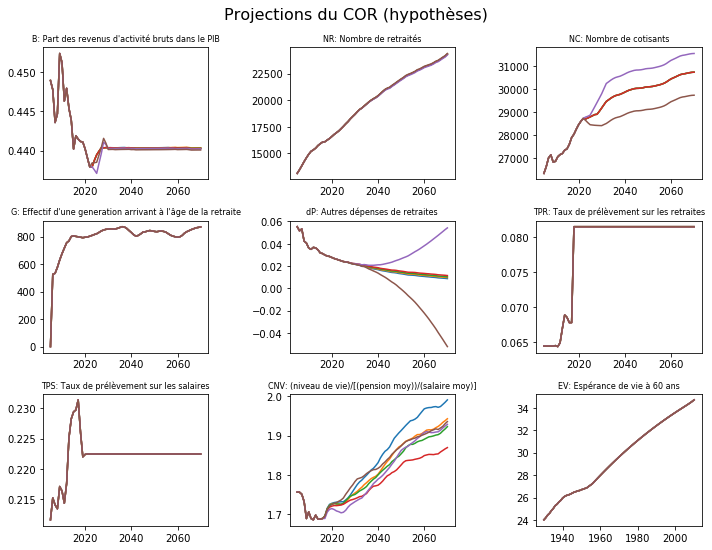

In [2]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
simulateur.dessineConjoncture()

In [3]:
analyse = simulateur.pilotageCOR()

## Statu quo (COR)

Cette stratégie de pilotage est celle du COR en 2019. 

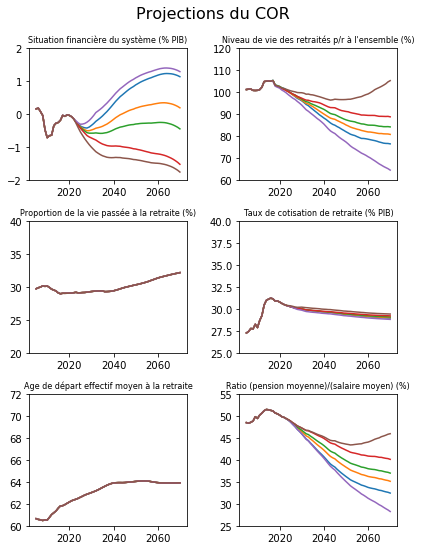

In [4]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')

analyse = simulateur.pilotageCOR()

pl.figure(figsize=(6,8))
pl.suptitle('Projections du COR',fontsize=16)
analyse.dessineSimulation()

On peut comparer les figures précédentes à celles extraites du rapport du COR de Juin 2019.

![Solde du système de retraite (Convention COR)](doc/COR-Solde-Financier-Juin-2019.png "Solde du système de retraite (COR, Juin 2019")

![Age de départ à la retraite (COR, Juin 2019)](doc/COR-Age-depart-retraite-Juin-2019.png "Age de départ à la retraite (COR, Juin 2019)")


![Niveau de vie des retraités par rapport à l'ensemble de la population (COR, Juin 2019)](doc/COR-Juin-2019-RNV.png "Niveau de vie des retraités par rapport à l'ensemble de la population (COR, Juin 2019)")

![Pension moyenne de l’ensemble des retraités,
relative au revenu d’activité moyen (COR, Juin 2019)](doc/COR-Juin-2019-P.png "Pension moyenne de l’ensemble des retraités, relative au revenu d’activité moyen (COR, Juin 2019)")

## Pilotage 1 : calcul à âge et niveau de vie défini

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau de vie par rapport à l'ensemble de la population, 
* le départ à un âge donné.


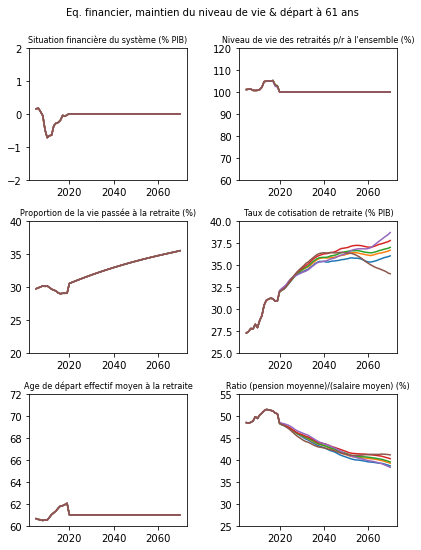

In [5]:
S = 0.0
Age = 61.0
RNV = 1.0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
analyse = simulateur.pilotageParAgeEtNiveauDeVie(Acible=Age, RNVcible=RNV, Scible=S)

pl.figure(figsize=(6,8))
if Age!=0:
    pl.suptitle( (u"Eq. financier, maintien du niveau de vie & départ à %d ans"%(Age)),fontsize=10)
else:
    pl.suptitle(u"Equilibre financier & maintien du niveau de vie",fontsize=10)
        
analyse.dessineSimulation()

#analyse.sauveFigure("cotisations")

## Pilotage 2 : calcul à cotisations et pensions définies

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau des pensions par rapport aux salaires,
* le taux de cotisations.

Le rapport (pension moyenne)/(salaire moyen) est maintenu constant et égal à celui de 2020.

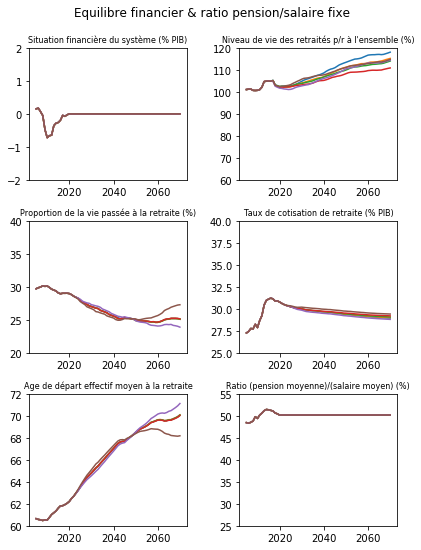

In [6]:
Pcible=simulateur.P[1][2020]

simulateur = SimulateurRetraites('retraites/fileProjection.json')
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier & ratio pension/salaire fixe',fontsize=12)
            
analyse = simulateur.pilotageParCotisationsEtPensions(Pcible=Pcible, Scible=0.0)
    
analyse.dessineSimulation()

In [7]:
print("Maintien du rapport pension moyenne / salaire moyen")
analyse.afficheSolutionsSimulateurCOR()

Maintien du rapport pension moyenne / salaire moyen
Valeurs à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 63.5 ans, 30.2 %, 50.2 %
 2030 : 64.8 ans, 30.0 %, 50.2 %
 2040 : 67.0 ans, 29.7 %, 50.2 %
 2050 : 68.5 ans, 29.4 %, 50.2 %
 2060 : 69.6 ans, 29.1 %, 50.2 %
 2070 : 70.1 ans, 28.9 %, 50.2 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 63.5 ans, 30.2 %, 50.2 %
 2030 : 64.8 ans, 30.0 %, 50.2 %
 2040 : 67.0 ans, 29.7 %, 50.2 %
 2050 : 68.5 ans, 29.4 %, 50.2 %
 2060 : 69.7 ans, 29.1 %, 50.2 %
 2070 : 70.1 ans, 29.0 %, 50.2 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 63.5 ans, 30.2 %, 50.2 %
 2030 : 64.8 ans, 30.0 %, 50.2 %
 2040 : 67.0 ans, 29.7 %, 50.2 

## Pilotage 3 : calcul à cotisations et niveau de vie défini

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau de vie des retraités par rapport à l'ensemble de la population,
* le taux de cotisations. 

Utilise le taux de cotisations du COR.

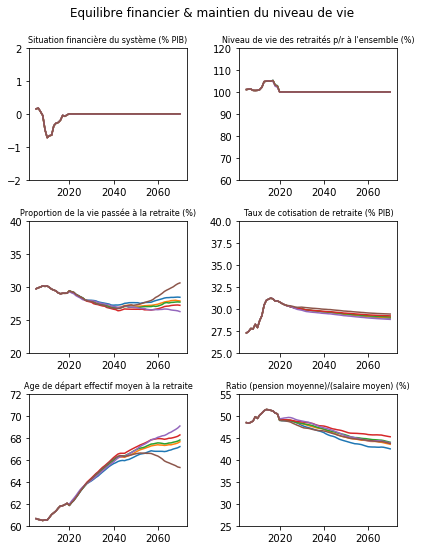

In [8]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
analyse = simulateur.pilotageParNiveauDeVieEtCotisations(RNVcible=1.0, Scible=0.0)
    
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier & maintien du niveau de vie',fontsize=12)
analyse.dessineSimulation()
#analyse.sauveFigure("macron_niveau_de_vie")

In [9]:
print("Maintien du niveau de vie")
analyse.afficheSolutionsSimulateurCOR()

Maintien du niveau de vie
Valeurs à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.8 ans, 30.8 %, 49.0 %
 2025 : 63.1 ans, 30.2 %, 48.9 %
 2030 : 64.1 ans, 30.0 %, 47.9 %
 2040 : 65.7 ans, 29.7 %, 46.2 %
 2050 : 66.3 ans, 29.4 %, 44.3 %
 2060 : 66.8 ans, 29.1 %, 43.0 %
 2070 : 67.2 ans, 28.9 %, 42.5 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.3 %
 2040 : 65.9 ans, 29.7 %, 47.0 %
 2050 : 66.7 ans, 29.4 %, 45.2 %
 2060 : 67.4 ans, 29.1 %, 44.3 %
 2070 : 67.7 ans, 29.0 %, 43.6 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.4 %
 2040 : 66.0 ans, 29.7 %, 47.0 %
 2050 : 66.9 ans, 29.4 %

## Pilotage 4 : calcul à cotisations et âge définis

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* un âge de départ à la retraite donné,
* un taux de cotisations donné.


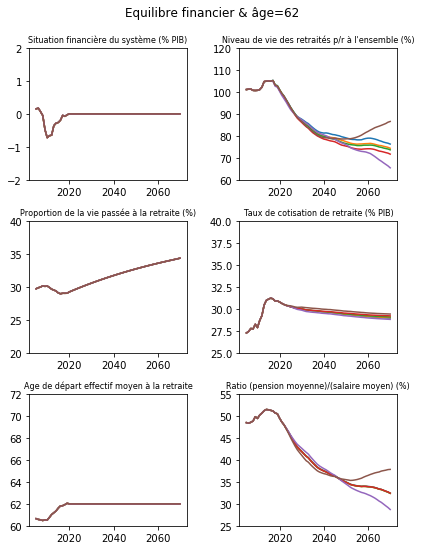

In [10]:
Acible = 62 # Age de départ à la retraite

simulateur = SimulateurRetraites('retraites/fileProjection.json')
analyse = simulateur.pilotageParCotisationsEtAge(Acible=Acible, Scible=0.0) 
    
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier & âge=%d'% (Acible),fontsize=12)
analyse.dessineSimulation()
#analyse.sauveFigure("pilotage4_age")

In [11]:
print("Pilotage 4 : age = %d ans" % (Acible))
analyse.afficheSolutionsSimulateurCOR()

Pilotage 4 : age = 62 ans
Valeurs à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.6 %
 2050 : 62.0 ans, 29.4 %, 35.0 %
 2060 : 62.0 ans, 29.1 %, 34.0 %
 2070 : 62.0 ans, 28.9 %, 32.4 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 29.4 %, 34.9 %
 2060 : 62.0 ans, 29.1 %, 33.9 %
 2070 : 62.0 ans, 29.0 %, 32.4 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.4 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 29.4 %

## D'après le COR, Macron & Philippe veulent vous faire travailler jusqu'à 68 ans (2)

Les calculs suivants ont étés utilisés pour la rédaction de l'article "D'après le COR, Macron & Philippe veulent vous faire travailler jusqu'à 68 ans (2)" : https://blogs.mediapart.fr/bruno-scherrer/blog/181219/dapres-le-cor-macron-philippe-veulent-vous-faire-travailler-jusqua-68-ans-2

Pilotage 3 : calcul à cotisations et niveau de vie défini.

Données et figure pour article 2


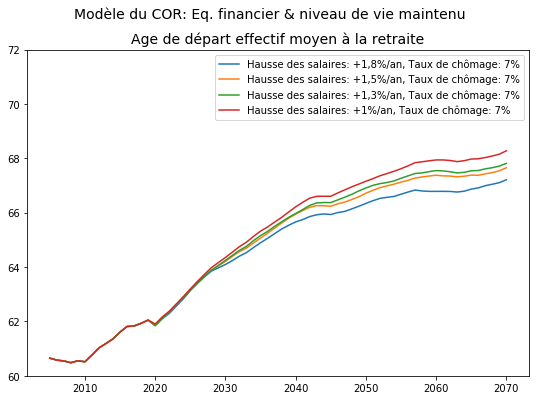

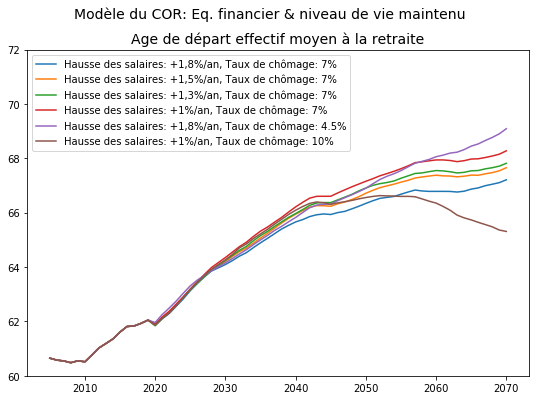

In [12]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
print("Données et figure pour article 2")

analyse = simulateur.pilotageParNiveauDeVieEtCotisations(RNVcible=1.0, Scible=0.0)
    
pl.figure(figsize=(9,6))
analyse.graphique("A", taille_fonte_titre = 14, dessine_legende = True, scenarios_indices = range(1,5))
pl.suptitle(u"Modèle du COR: Eq. financier & niveau de vie maintenu",fontsize=14)
pl.legend(loc="best")
#analyse.sauveFigure("macron_68_ans")

pl.figure(figsize=(9,6))
analyse.graphique("A", taille_fonte_titre = 14, dessine_legende = True)
pl.suptitle(u"Modèle du COR: Eq. financier & niveau de vie maintenu",fontsize=14)
pl.legend(loc="best");
#analyse.sauveFigure("macron_68_ans_tout")

In [13]:
print("Réforme Macron, Maintien du niveau de vie")
analyse.afficheSolutionsSimulateurCOR()

Réforme Macron, Maintien du niveau de vie
Valeurs à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.8 ans, 30.8 %, 49.0 %
 2025 : 63.1 ans, 30.2 %, 48.9 %
 2030 : 64.1 ans, 30.0 %, 47.9 %
 2040 : 65.7 ans, 29.7 %, 46.2 %
 2050 : 66.3 ans, 29.4 %, 44.3 %
 2060 : 66.8 ans, 29.1 %, 43.0 %
 2070 : 67.2 ans, 28.9 %, 42.5 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.3 %
 2040 : 65.9 ans, 29.7 %, 47.0 %
 2050 : 66.7 ans, 29.4 %, 45.2 %
 2060 : 67.4 ans, 29.1 %, 44.3 %
 2070 : 67.7 ans, 29.0 %, 43.6 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.4 %
 2040 : 66.0 ans, 29.7 %, 47.0 %
 2050 : 

## D'après le COR, Philippe vous donne la "liberté" de partir à 62 ans et d'être pauvre

Les calculs suivants ont étés utilisés pour la rédaction de l'article "D'après le COR, Philippe vous donne la "liberté" de partir à 62 ans et d'être pauvre" : https://blogs.mediapart.fr/bruno-scherrer/blog/201219/dapres-le-cor-philippe-vous-donne-la-liberte-de-partir-62-ans-et-detre-pauvre

Pilotage 4 : calcul à cotisations et âge définis.

Données et figures pour article 3


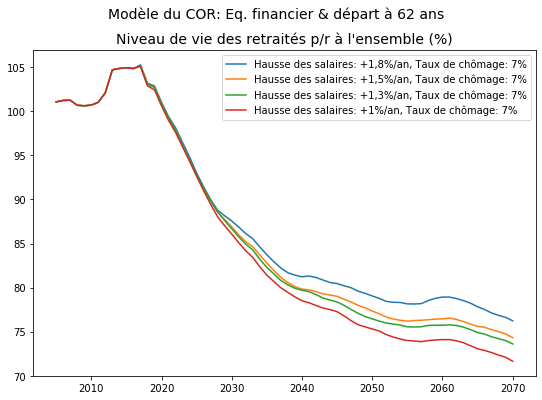

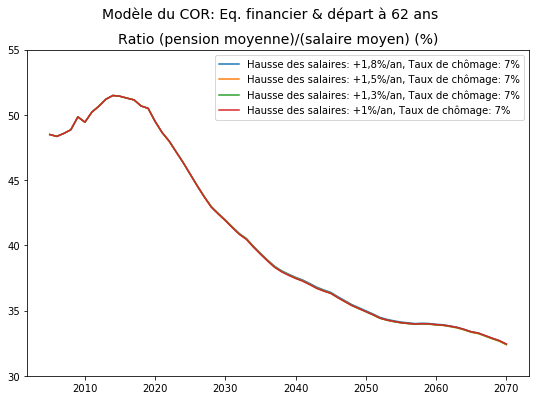

In [14]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
print("Données et figures pour article 3")

Acible = 62.0
analyse = simulateur.pilotageParCotisationsEtAge(Acible=Acible, Scible=0.0) 

titre=u"Modèle du COR: Eq. financier & départ à 62 ans"

pl.figure(figsize=(9,6))
analyse.graphique("RNV",taille_fonte_titre = 14, dessine_legende = True, scenarios_indices = range(1,5))
pl.suptitle(titre,fontsize=14)
pl.ylim(bottom=70.0, top=107.0)
pl.legend(loc="best")
#analyse.sauveFigure("macron_62_ans_nv")

pl.figure(figsize=(9,6))
analyse.graphique("P",taille_fonte_titre = 14, dessine_legende = True, scenarios_indices = range(1,5))
pl.suptitle(titre,fontsize=14)
pl.ylim(bottom=30.0)
pl.legend(loc="best");
#analyse.sauveFigure("macron_62_ans_p")

In [15]:
print("Réforme Macron, Départ à 62 ans")
analyse.afficheSolutionsSimulateurCOR()
print("Evolution du niveau de vie:")
analyse.afficheVariable(analyse.RNV)
print("Evolution du ratio pension/salaire:")
analyse.afficheVariable(analyse.P)

Réforme Macron, Départ à 62 ans
Valeurs à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.6 %
 2050 : 62.0 ans, 29.4 %, 35.0 %
 2060 : 62.0 ans, 29.1 %, 34.0 %
 2070 : 62.0 ans, 28.9 %, 32.4 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 29.4 %, 34.9 %
 2060 : 62.0 ans, 29.1 %, 33.9 %
 2070 : 62.0 ans, 29.0 %, 32.4 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.4 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 